## Scaling

Why?
- Make data normally distributed
- Minimize model bias
- Prepare to combine features

When?
- Feature engineering
- AFTER splitting

How?
- Features are scaled independently
- Learn parameters from train subset

Linear vs. Non-linear
- Linear maintains shape of original data
- Non-linear changes shape of data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_fwf('auto-mpg.data', header=None)
df.head()

,0,1,2,3,4,5,6,7,8
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,"""chevrolet chevelle malibu"""
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,"""buick skylark 320"""
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,"""plymouth satellite"""
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,"""amc rebel sst"""
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,"""ford torino"""


1. mpg: continuous
2. cylinders: multi-valued discrete
3. displacement: continuous
4. horsepower: continuous
5. weight: continuous
6. acceleration: continuous
7. model year: multi-valued discrete
8. origin: multi-valued discrete
9. car name: string (unique for each instance)

In [3]:
df.columns = ['mpg','cylinders','displ','horsepower','weight',
              'acc','year','origin','name']
df.head()

,mpg,cylinders,displ,horsepower,weight,acc,year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,"""chevrolet chevelle malibu"""
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,"""buick skylark 320"""
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,"""plymouth satellite"""
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,"""amc rebel sst"""
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,"""ford torino"""


In [4]:
df.shape

(398, 9)

In [5]:
df.isna().sum()

mpg           0
cylinders     0
displ         0
horsepower    0
weight        0
acc           0
year          0
origin        0
name          0
dtype: int64

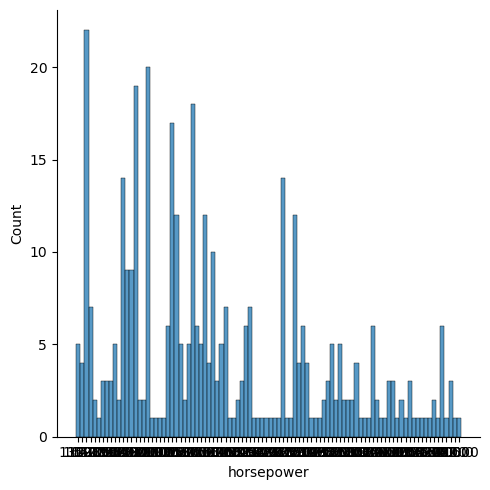

In [6]:
sns.displot(df['horsepower'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   mpg         398 non-null    float64
 1   cylinders   398 non-null    int64  
 2   displ       398 non-null    float64
 3   horsepower  398 non-null    object 
 4   weight      398 non-null    float64
 5   acc         398 non-null    float64
 6   year        398 non-null    int64  
 7   origin      398 non-null    int64  
 8   name        398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [8]:
df[df['horsepower'] == '?']

,mpg,cylinders,displ,horsepower,weight,acc,year,origin,name
32,25.0,4,98.0,?,2046.0,19.0,71,1,"""ford pinto"""
126,21.0,6,200.0,?,2875.0,17.0,74,1,"""ford maverick"""
330,40.9,4,85.0,?,1835.0,17.3,80,2,"""renault lecar deluxe"""
336,23.6,4,140.0,?,2905.0,14.3,80,1,"""ford mustang cobra"""
354,34.5,4,100.0,?,2320.0,15.8,81,2,"""renault 18i"""
374,23.0,4,151.0,?,3035.0,20.5,82,1,"""amc concord dl"""


In [9]:
df = df[df['horsepower'] != '?']

In [10]:
df['horsepower'] = df['horsepower'].astype('float')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   mpg         392 non-null    float64
 1   cylinders   392 non-null    int64  
 2   displ       392 non-null    float64
 3   horsepower  392 non-null    float64
 4   weight      392 non-null    float64
 5   acc         392 non-null    float64
 6   year        392 non-null    int64  
 7   origin      392 non-null    int64  
 8   name        392 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 30.6+ KB


## Min-max scaling

In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
mm_scaler = MinMaxScaler()

In [14]:
train, test = train_test_split(df, train_size=0.7, random_state=42)

In [15]:
train.shape, test.shape

((274, 9), (118, 9))

In [16]:
mm_scaler.fit(train[['horsepower']])

MinMaxScaler()

In [17]:
mm_horsepower = mm_scaler.transform(train[['horsepower']])

In [18]:
train['horsepower'].head()

110     94.0
17      85.0
320     92.0
24      90.0
128    100.0
Name: horsepower, dtype: float64

In [19]:
mm_horsepower[:5]

array([[0.25274725],
       [0.2032967 ],
       [0.24175824],
       [0.23076923],
       [0.28571429]])

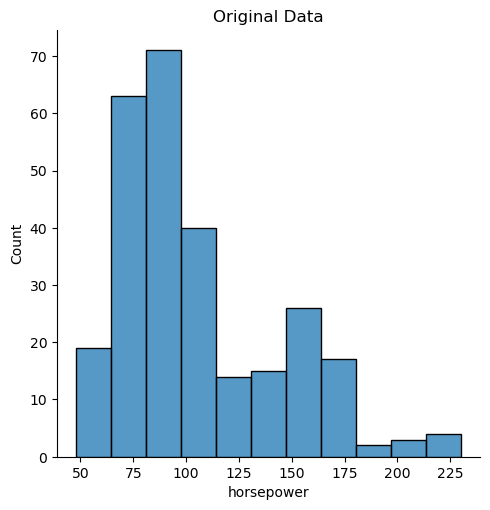

In [20]:
sns.displot(train['horsepower'])
plt.title('Original Data')
plt.show()

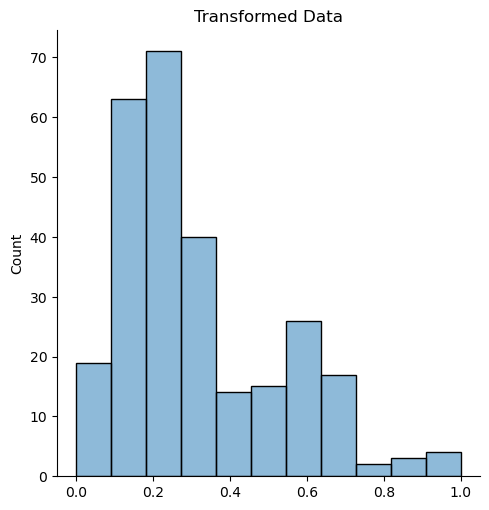

In [21]:
sns.displot(mm_horsepower, legend=None)
plt.title('Transformed Data')
plt.show()

## Standard Scaling

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
ss_scaler = StandardScaler()

In [24]:
ss_scaler.fit(train[['horsepower']])

StandardScaler()

In [25]:
ss_horsepower = ss_scaler.transform(train[['horsepower']])

In [26]:
ss_horsepower[:5]

array([[-0.28591285],
       [-0.52235185],
       [-0.33845485],
       [-0.39099685],
       [-0.12828685]])

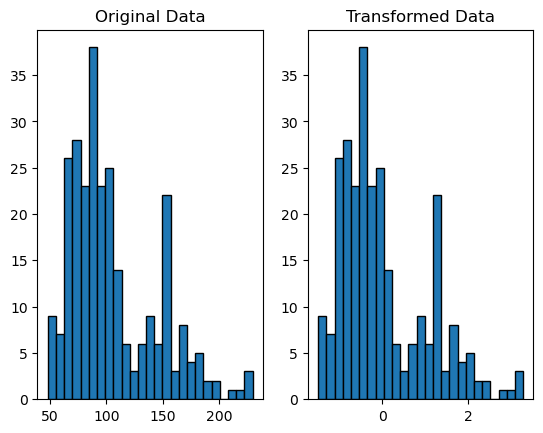

In [27]:
plt.subplot(121)
plt.hist(train['horsepower'], bins=25, ec='black')
plt.title('Original Data')

plt.subplot(122)
plt.hist(ss_horsepower, bins=25, ec='black')
plt.title('Transformed Data')

plt.show()

In [28]:
def compare_plots(transformed_data):
    
    plt.subplot(121)
    plt.hist(train['horsepower'], bins=25, ec='black')
    plt.title('Original Data')

    plt.subplot(122)
    plt.hist(transformed_data, bins=25, ec='black')
    plt.title('Transformed Data')
    plt.show()

## Robust Scaling

In [29]:
from sklearn.preprocessing import RobustScaler

In [30]:
rs_scaler = RobustScaler()

In [31]:
rs_scaler.fit(train[['horsepower']])

RobustScaler()

In [32]:
rs_horsepower = rs_scaler.transform(train[['horsepower']])

In [33]:
rs_horsepower[:5]

array([[ 0.00930233],
       [-0.15813953],
       [-0.02790698],
       [-0.06511628],
       [ 0.12093023]])

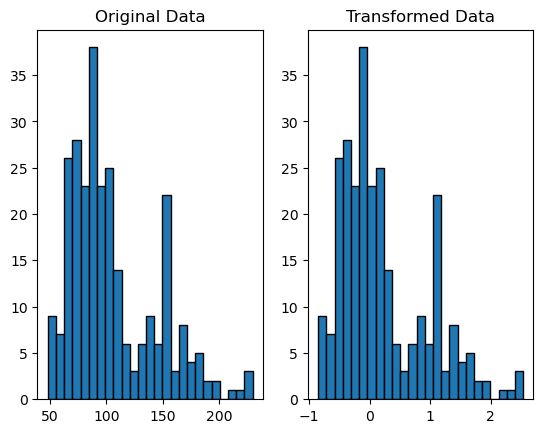

In [34]:
compare_plots(rs_horsepower)

In [35]:
rs_scaler.fit(train[['horsepower','weight']])

RobustScaler()

In [36]:
double_trouble = rs_scaler.transform(train[['horsepower','weight']])

In [37]:
double_trouble[:10]

array([[ 0.00930233, -0.31836291],
       [-0.15813953, -0.16769286],
       [-0.02790698, -0.27852227],
       [-0.06511628, -0.12350598],
       [ 0.12093023,  0.37486418],
       [-0.4744186 , -0.61463238],
       [ 0.02790698, -0.09018472],
       [-0.10232558, -0.05686346],
       [-0.77209302, -0.56754799],
       [-0.28837209, -0.45526983]])

In [38]:
pd.DataFrame(double_trouble)

,0,1
0,0.009302,-0.318363
1,-0.158140,-0.167693
2,-0.027907,-0.278522
3,-0.065116,-0.123506
4,0.120930,0.374864
...,...,...
269,1.051163,0.777617
270,0.120930,-0.021369
271,-0.158140,0.026440
272,-0.530233,-0.317639


In [39]:
rs_horsepower[:10]

array([[ 0.00930233],
       [-0.15813953],
       [-0.02790698],
       [-0.06511628],
       [ 0.12093023],
       [-0.4744186 ],
       [ 0.02790698],
       [-0.10232558],
       [-0.77209302],
       [-0.28837209]])

# Exercises

Do your work for these exercises in a jupyter notebook named scaling. Use the zillow dataset you acquired and prepped in previous lesson. Once you are finished, you may wish to repeat the exercises on another dataset for additional practice.

- Apply the scalers we talked about in this lesson to your data and visualize the results for the unscaled and scaled distribution .
- Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data?
- Read the documentation for sklearn's QuantileTransformer. Use normal for the output_distribution and apply this scaler to your data. Visualize the result of your data scaling.
- Use the QuantileTransformer, but omit the output_distribution argument. Visualize your results. What do you notice?
- Based on the work you've done, choose a scaling method for your dataset. Write a function within your prepare.py that accepts as input the train, validate, and test data splits, and returns the scaled versions of each. Be sure to only learn the parameters for scaling from your training data!

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wrangle import wrangle_zillow

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import QuantileTransformer

In [46]:
df = wrangle_zillow()

In [47]:
df.head()

,bed,bath,sqft,tax_value,year,taxamount,fips
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0
6,3.0,4.0,1620.0,847770.0,2011.0,10244.94,6037.0
7,3.0,2.0,2077.0,646760.0,1926.0,7924.68,6037.0
11,0.0,0.0,1200.0,5328.0,1972.0,91.60,6037.0
14,0.0,0.0,171.0,6920.0,1973.0,255.17,6037.0


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2130214 entries, 4 to 2152862
Data columns (total 7 columns):
 #   Column     Dtype  
---  ------     -----  
 0   bed        float64
 1   bath       float64
 2   sqft       float64
 3   tax_value  float64
 4   year       float64
 5   taxamount  float64
 6   fips       float64
dtypes: float64(7)
memory usage: 130.0 MB


In [71]:
train, test = train_test_split(df, train_size=.7, random_state=42)

In [72]:
train.shape, test.shape

((1491149, 7), (639065, 7))

In [73]:
mm_scaler = MinMaxScaler()

In [74]:
train_list = ['bed','bath','sqft','year','taxamount']

In [75]:
mm_scaler.fit(train[train_list])

MinMaxScaler()

In [76]:
mm_train = mm_scaler.transform(train[train_list])

In [81]:
mm_train = pd.DataFrame(mm_train, columns=train_list)
mm_train.head()

,bed,bath,sqft,year,taxamount
0,0.16,0.09375,0.002594,0.841860,0.005431
1,0.12,0.06250,0.001944,0.758140,0.003508
2,0.12,0.06250,0.001498,0.744186,0.006915
3,0.12,0.03125,0.001731,0.432558,0.006346
4,0.16,0.06250,0.001670,0.804651,0.001424


In [98]:
def compare_graphs(transformed, train_list=train_list):
    for i in train_list:
        print(i)
        plt.subplot(121)
        plt.hist(train[i], bins=25)
        plt.title('Original Data')

        plt.subplot(122)
        plt.hist(transformed[i], bins =25)
        plt.title('Transformed Data')
        plt.show()

In [87]:
mm_itrain = mm_scaler.inverse_transform(mm_train)

In [88]:
mm_itrain = pd.DataFrame(mm_itrain, columns=train_list)
mm_itrain.head()

,bed,bath,sqft,year,taxamount
0,4.0,3.0,2472.0,1982.0,5720.18
1,3.0,2.0,1853.0,1964.0,3696.90
2,3.0,2.0,1428.0,1961.0,7281.53
3,3.0,1.0,1650.0,1894.0,6682.36
4,4.0,2.0,1592.0,1974.0,1503.97


bed


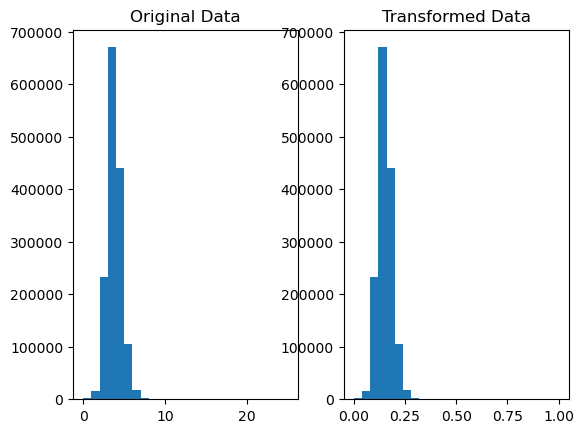

bath


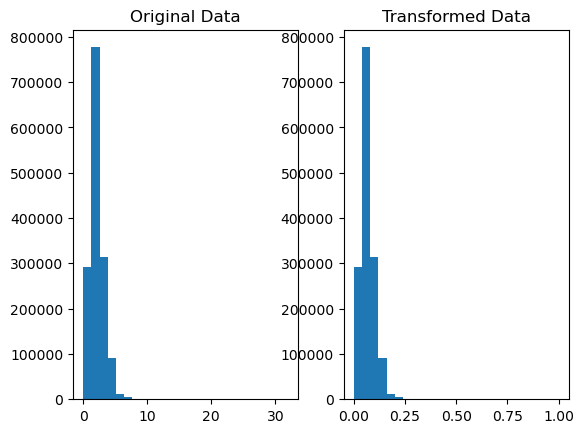

sqft


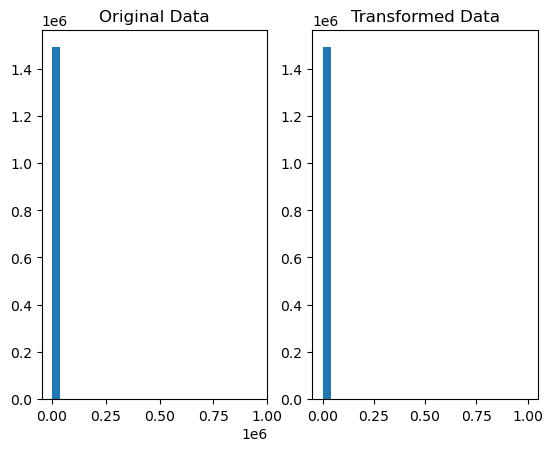

year


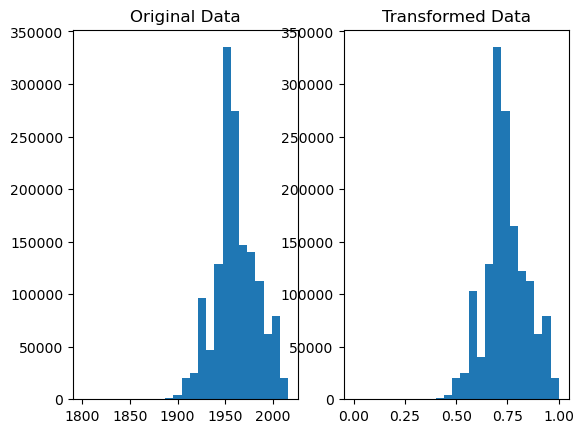

taxamount


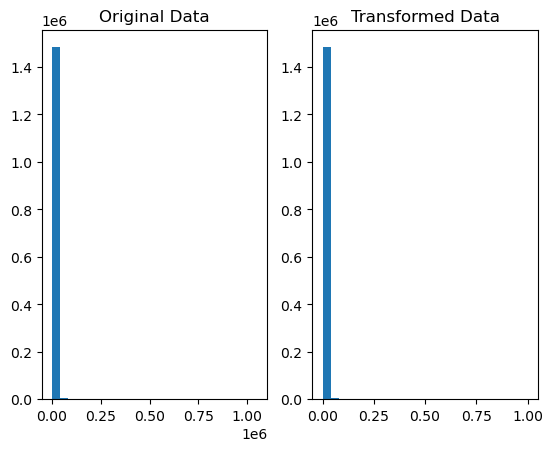

In [99]:
compare_graphs(mm_train)

In [90]:
ss_scaler = StandardScaler()

In [91]:
ss_scaler.fit(train[train_list])

StandardScaler()

In [92]:
ss_train = ss_scaler.transform(train[train_list])

In [95]:
ss_train = pd.DataFrame(ss_train, columns=train_list)
ss_train.head()

,bed,bath,sqft,year,taxamount
0,0.747967,0.765962,0.460813,0.952615,0.012756
1,-0.324163,-0.243089,-0.008982,0.139170,-0.246963
2,-0.324163,-0.243089,-0.331539,0.003595,0.213180
3,-0.324163,-1.252139,-0.163050,-3.024231,0.136267
4,0.747967,-0.243089,-0.207070,0.591084,-0.528459


bed


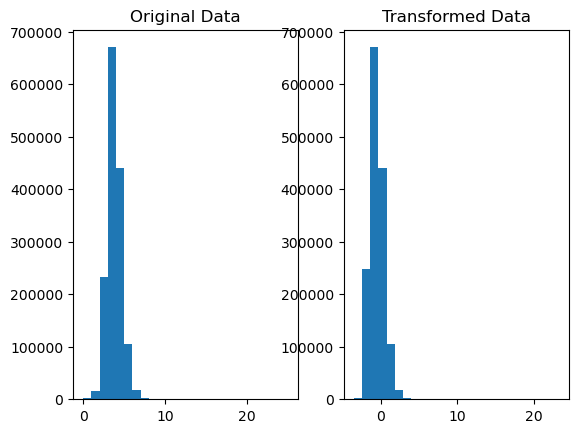

bath


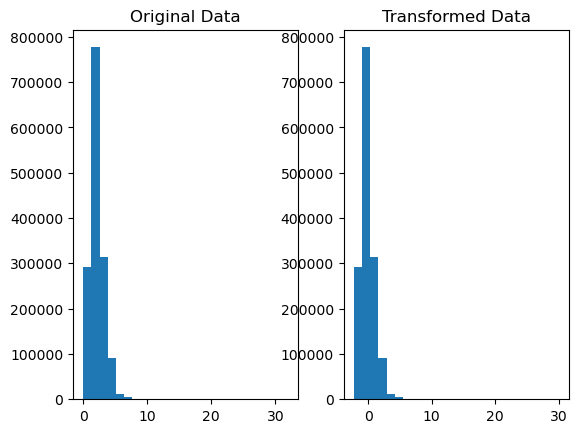

sqft


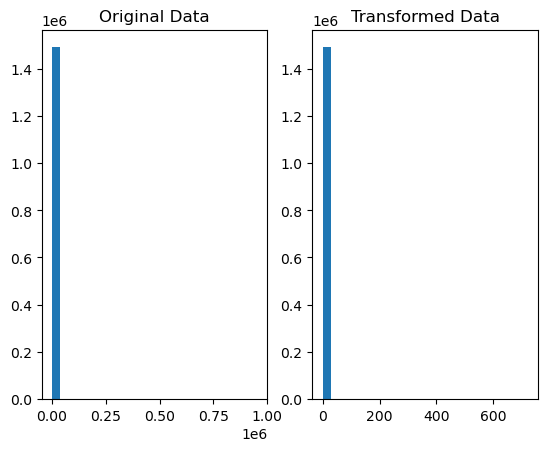

year


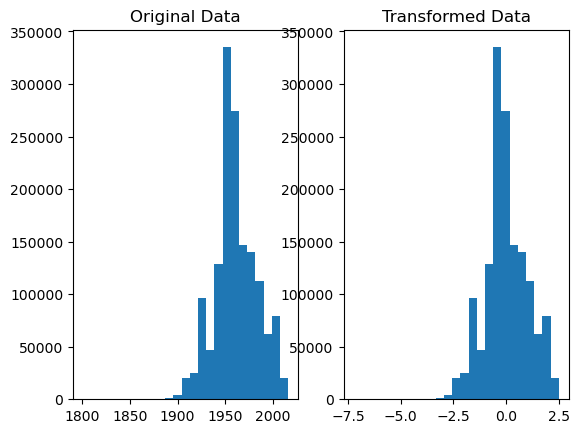

taxamount


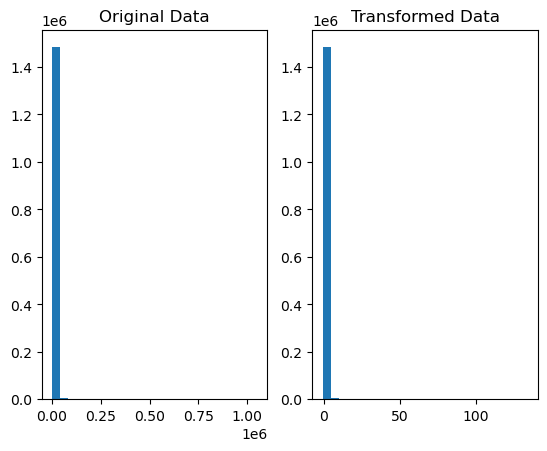

In [101]:
compare_graphs(ss_train)

In [102]:
rs_scaler = RobustScaler()

In [103]:
rs_scaler.fit(train[train_list])

RobustScaler()

In [104]:
rs_train = rs_scaler.transform(train[train_list])

In [105]:
rs_train = pd.DataFrame(rs_train, columns=train_list)
rs_train.head()

,bed,bath,sqft,year,taxamount
0,1.0,1.0,0.891693,0.923077,0.415637
1,0.0,0.0,0.240799,0.230769,-0.107339
2,0.0,0.0,-0.206099,0.115385,0.819214
3,0.0,-1.0,0.027340,-2.461538,0.664341
4,1.0,0.0,-0.033649,0.615385,-0.674166


bed


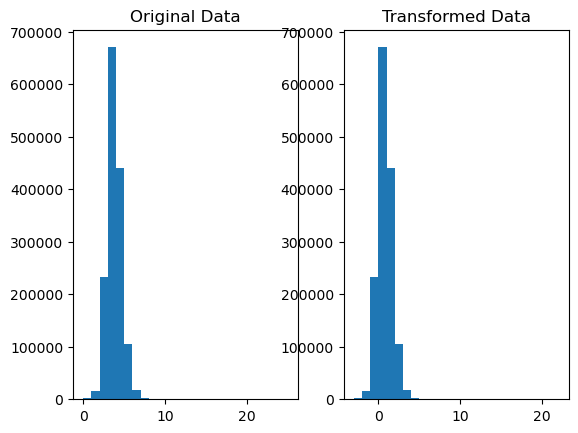

bath


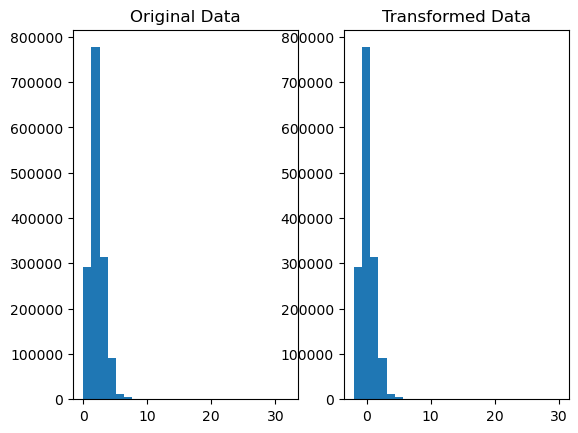

sqft


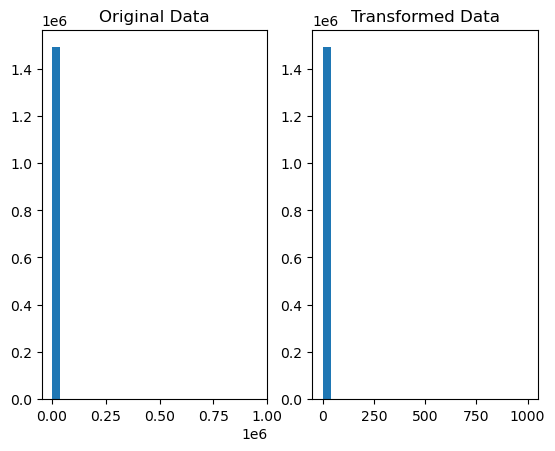

year


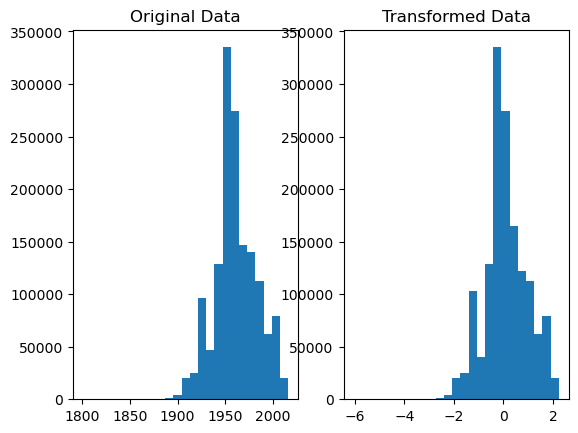

taxamount


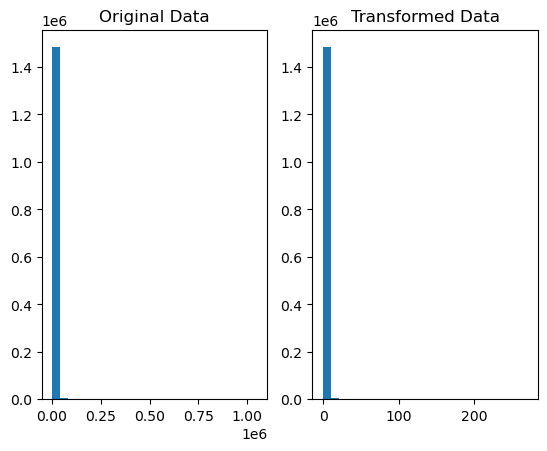

In [106]:
compare_graphs(rs_train)

In [139]:
qt = QuantileTransformer(random_state=42)

In [140]:
qt_train = qt.fit_transform(train[train_list])

In [141]:
qt_train = pd.DataFrame(qt_train, columns=train_list)
qt_train.head()

,bed,bath,sqft,year,taxamount
0,0.767768,0.812813,0.819319,0.817317,0.693318
1,0.395395,0.428929,0.621121,0.609610,0.440181
2,0.395395,0.428929,0.368368,0.548048,0.804985
3,0.395395,0.098599,0.516517,0.000824,0.768906
4,0.767768,0.428929,0.479479,0.736236,0.122569


bed


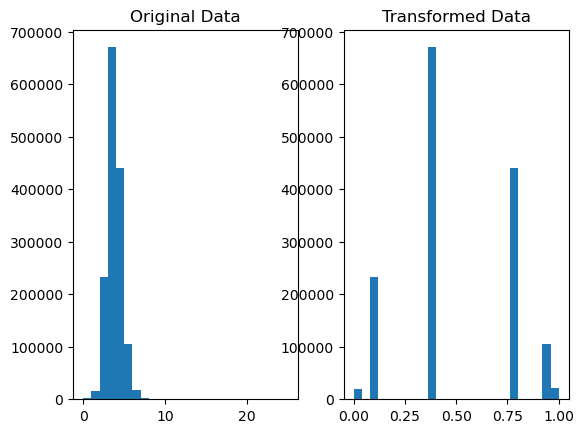

bath


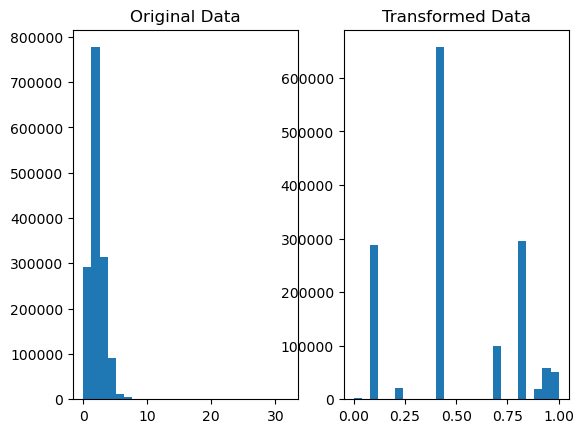

sqft


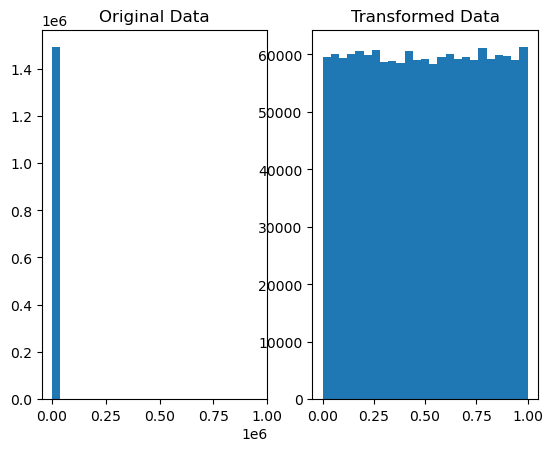

year


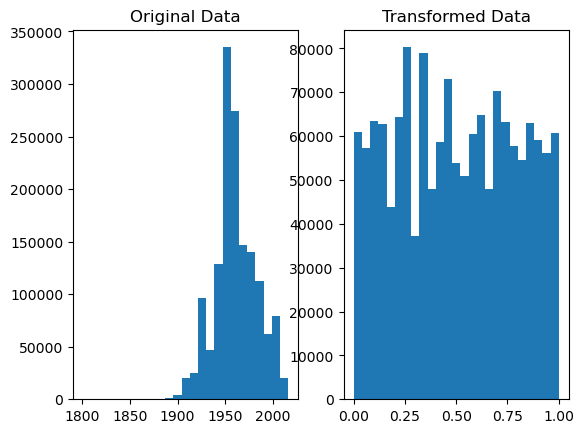

taxamount


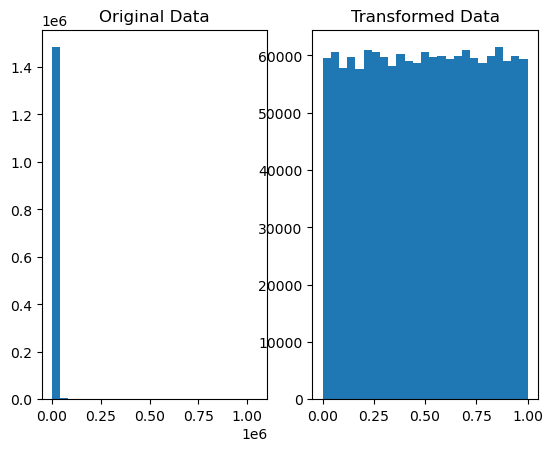

In [142]:
compare_graphs(qt_train)

In [152]:
qt = QuantileTransformer(output_distribution='normal', random_state=42)

In [153]:
qt_train = qt.fit_transform(train[train_list])

In [154]:
qt_train = pd.DataFrame(qt_train, columns=train_list)
qt_train.head()

,bed,bath,sqft,year,taxamount
0,0.731515,0.888309,0.912774,0.905189,0.505276
1,-0.265284,-0.179102,0.308427,0.278302,-0.150511
2,-0.265284,-0.179102,-0.336178,0.120731,0.859564
3,-0.265284,-1.289578,0.041413,-3.147149,0.735247
4,0.731515,-0.179102,-0.051460,0.631785,-1.162240


bed


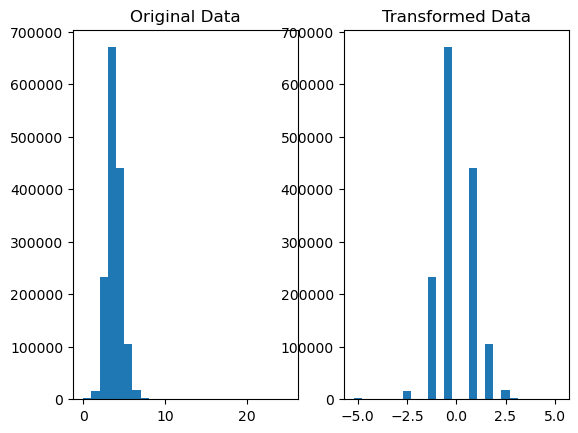

bath


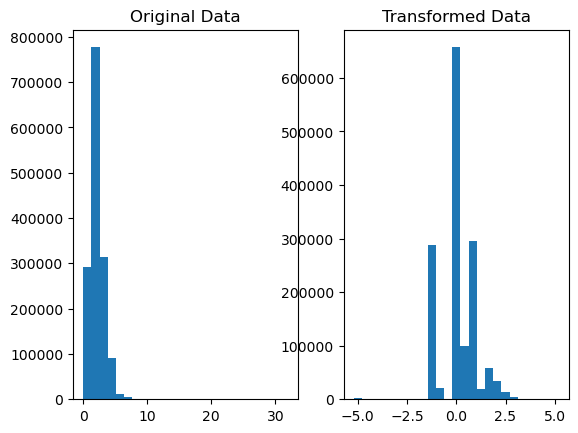

sqft


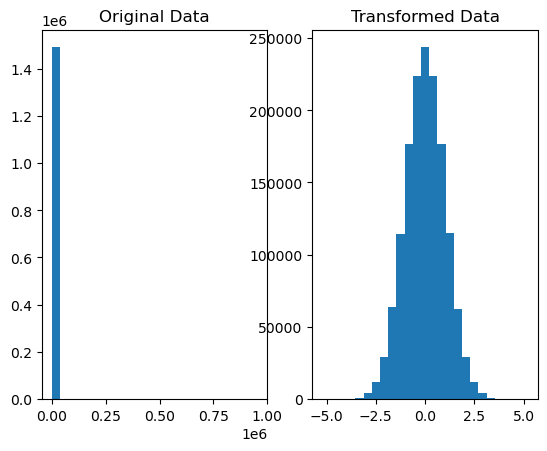

year


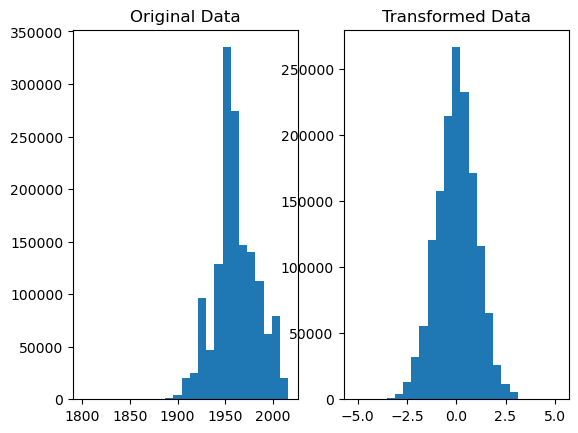

taxamount


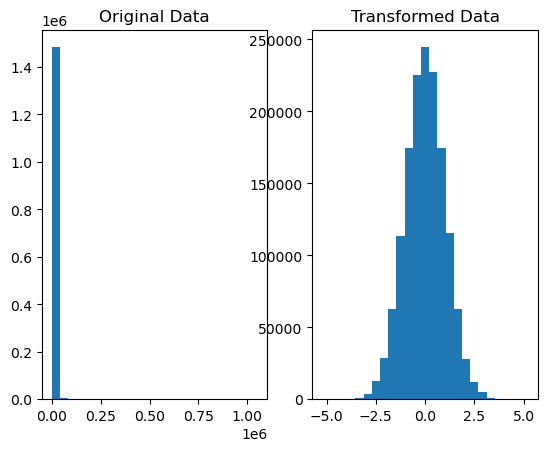

In [155]:
compare_graphs(qt_train)

In [158]:
qt_itrain = qt.inverse_transform(qt_train)

In [159]:
qt_itrain = pd.DataFrame(qt_itrain, columns=train_list)
qt_itrain.head()

,bed,bath,sqft,year,taxamount
0,4.0,3.0,2472.0,1982.0,5720.18
1,3.0,2.0,1853.0,1964.0,3696.90
2,3.0,2.0,1428.0,1961.0,7281.53
3,3.0,1.0,1650.0,1894.0,6682.36
4,4.0,2.0,1592.0,1974.0,1503.97


In [123]:
def mm_scaler(train, val, test, col_list):
    
    mm_scale = MinMaxScaler()
    mm_scale.fit(train[col_list])
    
    mm_train = mm_scale.transform(train[col_list])
    mm_val = mm_scale.transform(val[col_list])
    mm_test = mm_scale.transform(test[col_list])
    
    mm_train = pd.DataFrame(mm_train, columns=col_list)
    mm_val = pd.DataFrame(mm_val, columns=col_list)
    mm_test = pd.DataFrame(mm_test, columns=col_list)
    
    return mm_train, mm_val, mm_test

In [124]:
def ss_scaler(train, val, test, col_list):
    
    ss_scale = StandardScaler()
    ss_scale.fit(train[col_list])
    
    ss_train = ss_scale.transform(train[col_list])
    ss_val = ss_scale.transform(val[col_list])
    ss_test = ss_scale.transform(test[col_list])
    
    ss_train = pd.DataFrame(ss_train, columns=col_list)
    ss_val = pd.DataFrame(ss_val, columns=col_list)
    ss_test = pd.DataFrame(ss_test, columns=col_list)
    
    return ss_train, ss_val, ss_test

In [125]:
def rs_scaler(train, val, test, col_list):
    
    rs_scale = RobustScaler()
    rs_scale.fit(train[col_list])
    
    rs_train = rs_scale.transform(train[col_list])
    rs_val = rs_scale.transform(val[col_list])
    rs_test = rs_scale.transform(test[col_list])
    
    rs_train = pd.DataFrame(rs_train, columns=col_list)
    rs_val = pd.DataFrame(rs_val, columns=col_list)
    rs_test = pd.DataFrame(rs_test, columns=col_list)
    
    return rs_train, rs_val, rs_test

In [143]:
def qt_scaler(train, val, test, col_list, dist='normal'):
    
    qt_scale = QuantileTransformer(output_distribution=dist, random_state=42)
    qt_scale.fit(train[col_list])
    
    qt_train = qt_scale.transform(train[col_list])
    qt_val = qt_scale.transform(val[col_list])
    qt_test = qt_scale.transform(test[col_list])
    
    qt_train = pd.DataFrame(qt_train, columns=col_list)
    qt_val = pd.DataFrame(qt_val, columns=col_list)
    qt_test = pd.DataFrame(qt_test, columns=col_list)
    
    return qt_train, qt_val, qt_test

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2130214 entries, 4 to 2152862
Data columns (total 7 columns):
 #   Column     Dtype  
---  ------     -----  
 0   bed        float64
 1   bath       float64
 2   sqft       float64
 3   tax_value  float64
 4   year       float64
 5   taxamount  float64
 6   fips       float64
dtypes: float64(7)
memory usage: 130.0 MB


In [ ]:
def remove_outliers(df, k=1.5):
    a=[]
    b=[]
    fences=[a, b]
    features= []
    col_list = df.columns.tolist()
    i=0
    for col in df:
            new_df=np.where(df[col].nunique()>8, True, False)
            if new_df==True:
                if df[col].dtype == 'float' or df[col].dtype == 'int':
                    '''
                    for each feature find the first and third quartile
                    '''
                    q1, q3 = df[col].quantile([.25, .75])
                    '''
                    calculate inter quartile range
                    '''
                    iqr = q3 - q1
                    '''
                    calculate the upper and lower fence
                    '''
                    upper_fence = q3 + (k * iqr)
                    lower_fence = q1 - (k * iqr)
                    '''
                    appending the upper and lower fences to lists
                    '''
                    a.append(upper_fence)
                    b.append(lower_fence)
                    '''
                    appending the feature names to a list
                    '''
                    features.append(col)
                    '''
                    assigning the fences and feature names to a dataframe
                    '''
                    var_fences= pd.DataFrame(fences, columns=features, index=['upper_fence', 'lower_fence'])
                else:
                    print(col)
                    print('column is not a float or int')
            else:
                print(f'{col} column ignored')
    for col in col_list[:6]:
        df = df[(df[col]<= a[i]) & (df[col]>= b[i])]
        i+=1
    return df, var_fences